In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
twenty_year = pd.read_csv('ign_changed.csv', encoding = "ISO-8859-1")
twenty_year.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [3]:
vg_sales = pd.read_csv('vgsales.csv')
vg_sales.head(5)

,4,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
year_most_genre = {}
year_string_type = {}

for i in range(1980, 2017):
    year_string_type[i]=(str(i))

for i in range(1980, 2017):

    year_genre_count = vg_sales[vg_sales['Year'] == i]
    yg_result = pd.DataFrame(year_genre_count.groupby('Genre').count().sort_values(by='Name', ascending=False))
    sum_count = int(yg_result.sum()['Name'])
    save_genre_name = yg_result.index[0]
    save_genre_percent = yg_result.iloc[0]['Name']/sum_count * 100
    yg_result = pd.DataFrame(yg_result['Name'])
    yg_result.rename(columns={'Name' : 'Count'}, inplace=True)
    print(yg_result)
    print('most Genre:', save_genre_name)
    print('percent:', end=' ')
    print(save_genre_percent, '%', sep='')
    print(' ')
    year_most_genre[i] = [save_genre_name, save_genre_percent]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [6]:
#연도에 따른 가장 많이 출시된 장르와 그 비율
year_most_genre = pd.DataFrame(year_most_genre)
pd.set_option('display.max_columns', 38)
year_most_genre.index.name = 'Info'
year_most_genre.rename({0: 'Most_Genre', 1: 'Release_Ratio'}, inplace=True)
print('각 연도별 가장 많이 출시된 장르와 해당 연도의 출시 비율')
year_most_genre

각 연도별 가장 많이 출시된 장르와 해당 연도의 출시 비율


""
Info


(0, 300)

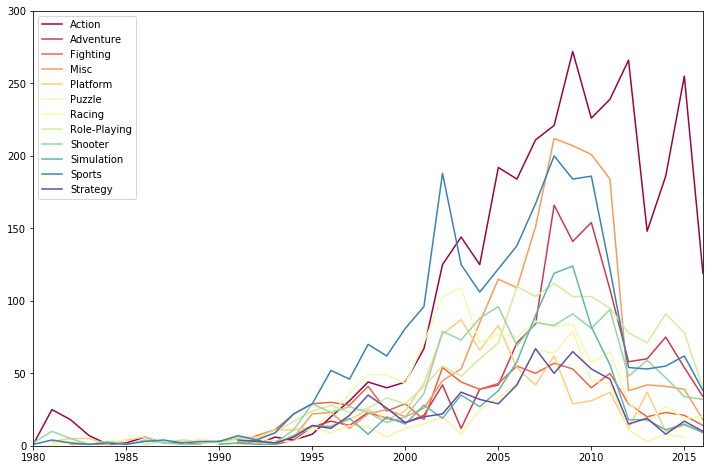

In [12]:
#각 연도별 가장 많이 출시된 장르와 해당 연도의 출시 비율
#x축은 연도
#y축은 출시 개수
#각 장르를 색깔로 나타내기

#index: 연도
#columns: 장르의 이름과 각 value는 해당 장르의 출시 게임 수
year_list = []
ygc_dict = {}
for i in range(1980, 2017):
    year_list.append(i)
    
for i in range(1980, 2017):
    year_genre_count = vg_sales[vg_sales['Year'] == i]
    yg_result = year_genre_count.groupby('Genre')['Name'].count().dropna()
    #yg_result = pd.DataFrame(yg_result['Name'])
    #yg_result.rename(columns={'Name' : 'Count'}, inplace=True)
    year_str = i
    ygc_dict[year_str] = yg_result

ygc_df = pd.DataFrame(ygc_dict) #index는 장르 이름, column은 연도인 dataframe 완성
ygc_df = ygc_df[year_list]
ygc_df = ygc_df.transpose() #index는 연도, column은 장르 이름
ygc_plot = ygc_df.plot(kind='line', figsize=(12, 8), cmap=plt.cm.Spectral)
ygc_plot.set_ylim([0, 300])

In [14]:
#실제로 해당 연도에서 가장 많이 팔린 장르와 그 연도의 총 판매량의 비율 확인하기
year_sales_sum = pd.DataFrame(vg_sales.groupby('Year')['Global_Sales'].sum()).dropna()
year_sales_max = pd.DataFrame(vg_sales.groupby('Year')['Global_Sales'].max()).dropna()
#print(year_sales_sum)
#print(year_sales_max)

year_best_genre = {}
for i in range(1980, 2017):
    year_sales_count = vg_sales[(vg_sales['Year'] == i)]
    ys_best_result = year_sales_count.groupby('Genre')['Global_Sales'].max().dropna()
    ys_best_result.sort_values(ascending=False, inplace=True) #해당 연도에서 판매액이 높은 순서대로 장르 나열
    ys_sales_total = ys_best_result.sum() #해당 연도의 총 판매액
    sales_percent = (int(ys_best_result.iloc[0]) / ys_sales_total) * 100
    year_best_genre[i] = [ys_best_result.index[0] , sales_percent]

print('')
for i in range(1980, 2017):
    print(i, ':', year_best_genre[i])


1980 : ['Shooter', 56.657223796034]
1981 : ['Platform', 34.27592116538132]
1982 : ['Puzzle', 50.79825834542816]
1983 : ['Sports', 29.850746268656714]
1984 : ['Shooter', 67.16238906212521]
1985 : ['Platform', 81.46639511201629]
1986 : ['Action', 33.1858407079646]
1987 : ['Adventure', 28.28854314002829]
1988 : ['Platform', 50.98980203959209]
1989 : ['Puzzle', 51.48446885189634]
1990 : ['Platform', 53.74899220639613]
1991 : ['Action', 19.230769230769234]
1992 : ['Adventure', 22.950135614437723]
1993 : ['Platform', 44.82294935006722]
1994 : ['Platform', 29.546946815495733]
1995 : ['Platform', 18.64280387770321]
1996 : ['Role-Playing', 37.75423212763366]
1997 : ['Racing', 18.158707100054475]
1998 : ['Role-Playing', 23.94390285616555]
1999 : ['Role-Playing', 30.715811965811973]
2000 : ['Role-Playing', 16.159439806086727]
2001 : ['Racing', 18.947083502503727]
2002 : ['Action', 23.984410133413284]
2003 : ['Racing', 16.29422718808194]
2004 : ['Action', 25.71685740002571]
2005 : ['Simulation', 

In [15]:
year_best_genre = pd.DataFrame(year_best_genre)
year_best_genre.index.name = 'Info'
year_best_genre.rename({0: 'Best_Genre', 1: 'Sales_Ratio'}, inplace=True)
print('각 연도별 가장 많이 판매된 장르와 해당 연도의 판매 비율')
year_best_genre

각 연도별 가장 많이 판매된 장르와 해당 연도의 판매 비율


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Info,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Best_Genre,Shooter,Platform,Puzzle,Sports,Shooter,Platform,Action,Adventure,Platform,Puzzle,Platform,Action,Adventure,Platform,Platform,Platform,Role-Playing,Racing,Role-Playing,Role-Playing,Role-Playing,Racing,Action,Racing,Action,Simulation,Sports,Sports,Racing,Sports,Misc,Shooter,Shooter,Action,Action,Shooter,Sports
Sales_Ratio,56.6572,34.2759,50.7983,29.8507,67.1624,81.4664,33.1858,28.2885,50.9898,51.4845,53.749,19.2308,22.9501,44.8229,29.5469,18.6428,37.7542,18.1587,23.9439,30.7158,16.1594,18.9471,23.9844,16.2942,25.7169,21.1902,42.9409,24.8869,34.2566,26.4911,21.4198,16.7464,21.3708,26.0062,17.142,28.2429,24.3013


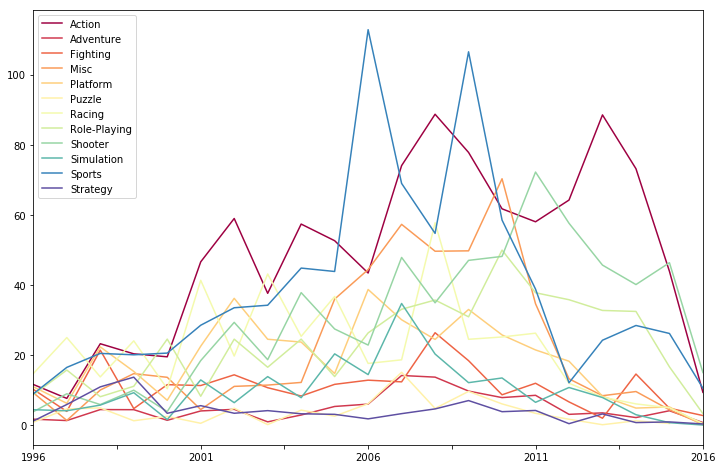

In [16]:
#각 연도별 가장 많이 판매된 장르와 해당 연도의 판매 비율
#x축은 연도
#y축은 판매액
#각 장르를 색깔로 나타내기

#index: 연도
#columns: 장르의 이름과 각 value는 해당 장르의 판매액

ygs_dict = {}

year_sales_sum = pd.DataFrame(vg_sales.groupby('Year')['Global_Sales'].sum()).dropna()

for i in range(1996, 2017):
    year_gsales_sum = vg_sales[vg_sales['Year'] == i].dropna()
    year_gsales_sum = year_gsales_sum.groupby('Genre')['Global_Sales'].sum().dropna()
    ygs_dict[i] = year_gsales_sum

ygs_df = pd.DataFrame(ygs_dict)
#print(ygs_df)

for i in range(1996, 2017):
    temp_value = i
    temp_value = str(i)
    ygs_df.rename(columns={i : temp_value}, inplace=True)
    
ygs_df = pd.DataFrame(ygs_df).transpose()
    
ygs_plot = ygs_df.plot(kind='line', figsize=(12, 8), cmap=plt.cm.Spectral)


In [17]:
#연도에 따른 두 가지 분석을 merge
merge_most_best = pd.concat([year_most_genre, year_best_genre])
merge_most_best

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Info,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Most_Genre,Misc,Action,Action,Action,Puzzle,Platform,Action,Sports,Platform,Puzzle,Action,Sports,Fighting,Fighting,Fighting,Fighting,Sports,Sports,Sports,Sports,Sports,Sports,Sports,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action
Release_Ratio,44.4444,54.3478,50,41.1765,21.4286,28.5714,28.5714,25,26.6667,29.4118,18.75,17.0732,16.2791,18.3333,18.1818,13.242,19.7719,15.917,18.4697,18.3432,23.2092,19.917,22.6779,18.5806,16.3827,20.4038,18.254,17.5541,15.4762,18.9944,17.9508,20.9833,40.4871,27.1062,31.9588,41.5309,34.593
Best_Genre,Shooter,Platform,Puzzle,Sports,Shooter,Platform,Action,Adventure,Platform,Puzzle,Platform,Action,Adventure,Platform,Platform,Platform,Role-Playing,Racing,Role-Playing,Role-Playing,Role-Playing,Racing,Action,Racing,Action,Simulation,Sports,Sports,Racing,Sports,Misc,Shooter,Shooter,Action,Action,Shooter,Sports
Sales_Ratio,56.6572,34.2759,50.7983,29.8507,67.1624,81.4664,33.1858,28.2885,50.9898,51.4845,53.749,19.2308,22.9501,44.8229,29.5469,18.6428,37.7542,18.1587,23.9439,30.7158,16.1594,18.9471,23.9844,16.2942,25.7169,21.1902,42.9409,24.8869,34.2566,26.4911,21.4198,16.7464,21.3708,26.0062,17.142,28.2429,24.3013


In [18]:
#Platform마다 판매량이 가장 높은 장르 찾기
plat_unique_name = vg_sales.groupby('Platform').count()
plat_unique_name = plat_unique_name.index.values.tolist()

plat_best_genre = {}

for name in plat_unique_name :
    plat_unique_df = vg_sales[vg_sales['Platform'] == name] #platform에 따라 df를 가져옵니다
    plat_genre_sum = pd.DataFrame(plat_unique_df.groupby('Genre')['Global_Sales'].sum())
    plat_genre_sum = plat_genre_sum.sort_values(by='Global_Sales', ascending=False)
    plat_all_sales = plat_genre_sum.sum()
    print('-----------------------------')
    print('Platform name: ', name)
    best_genre = plat_genre_sum.index[0]
    print('best genre: ', best_genre)
    print('best genre sales: ', float(plat_genre_sum.iloc[0]))
    print('total sales: ', float(plat_all_sales))
    print('<detailed information>')
    print(plat_genre_sum)
    print('-----------------------------')
    print(' ')
    plat_best_genre[name] = [best_genre, float(plat_genre_sum.iloc[0]), float(plat_all_sales)]

-----------------------------
Platform name:  2600
best genre:  Action
best genre sales:  29.339999999999986
total sales:  97.07999999999998
<detailed information>
            Global_Sales
Genre                   
Action             29.34
Shooter            26.48
Puzzle             14.68
Platform           13.27
Misc                3.58
Sports              3.43
Racing              2.91
Adventure           1.70
Fighting            1.24
Simulation          0.45
-----------------------------
 
-----------------------------
Platform name:  3DO
best genre:  Adventure
best genre sales:  0.06
total sales:  0.1
<detailed information>
            Global_Sales
Genre                   
Adventure           0.06
Puzzle              0.02
Simulation          0.02
-----------------------------
 
-----------------------------
Platform name:  DC
best genre:  Sports
best genre sales:  3.6599999999999997
total sales:  15.969999999999999
<detailed information>
              Global_Sales
Genre              

In [19]:
plat_best_genre = pd.DataFrame(plat_best_genre)
plat_best_genre.rename({0: 'Best Genre', 1: 'Global Sales'}, inplace=True)
plat_best_genre

,2600,3DO,DC,GG,Game Boy,Game Boy Advance,Game Cube,Genesis,NES,NG,Nintendo 3DS,Nintendo 64,Nintendo DS,PC,PCFX,PlayStation,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation Portable,PlayStation Vita,SAT,SCD,Super NES,TG16,WS,Wii,Wii U,Xbox,Xbox 360,Xbox One
Best Genre,Action,Adventure,Sports,Platform,Role-Playing,Platform,Action,Platform,Platform,Fighting,Role-Playing,Racing,Misc,Simulation,Role-Playing,Action,Sports,Action,Action,Action,Action,Fighting,Platform,Platform,Adventure,Role-Playing,Sports,Platform,Shooter,Shooter,Shooter
Global Sales,29.34,0.06,3.66,0.04,88.24,78.3,37.84,15.45,95.78,1.42,75.74,40.09,137.76,51.91,0.03,127.05,273.41,307.88,87.06,64.72,20.01,8.52,1.5,65.65,0.14,1.22,292.06,21.24,63.55,278.55,51.61
2,97.08,0.1,15.97,0.04,255.45,318.5,199.36,28.36,251.07,1.44,247.46,218.88,822.49,258.82,0.03,730.66,1255.64,957.84,278.1,296.28,61.93,33.59,1.87,200.05,0.16,1.42,926.71,81.86,258.26,979.96,141.06


In [20]:
for name in plat_unique_name :
    plat_unique_df = vg_sales[vg_sales['Platform'] == name] #platform에 따라 df를 가져옵니다
    plat_genre_NA = pd.DataFrame(plat_unique_df.groupby('Genre')['NA_Sales'].sum()).sort_values(by='NA_Sales', ascending=False)
    plat_genre_EU = pd.DataFrame(plat_unique_df.groupby('Genre')['EU_Sales'].sum()).sort_values(by='EU_Sales', ascending=False)
    plat_genre_JP = pd.DataFrame(plat_unique_df.groupby('Genre')['JP_Sales'].sum()).sort_values(by='JP_Sales', ascending=False)
    NA_max_sales = plat_genre_NA.iloc[0]
    best_genre_NA = plat_genre_NA.index[0]
    EU_max_sales = plat_genre_EU.iloc[0]
    best_genre_EU = plat_genre_EU.index[0]
    JP_max_sales = plat_genre_JP.iloc[0]
    best_genre_JP = plat_genre_JP.index[0]
    print('--------------------------')
    print('Platform: ', name)
    print('NA_max_sales: ', float(NA_max_sales))
    print('NA best genre: ', best_genre_NA)
    print('EU_max_sales: ', float(EU_max_sales))
    print('EU best genre: ', best_genre_EU)
    print('JP_max_sales: ', float(JP_max_sales))
    print('JP best genre: ', best_genre_JP)
    print('--------------------------')

--------------------------
Platform:  2600
NA_max_sales:  27.390000000000004
NA best genre:  Action
EU_max_sales:  1.6400000000000008
EU best genre:  Action
JP_max_sales:  0.0
JP best genre:  Action
--------------------------
--------------------------
Platform:  3DO
NA_max_sales:  0.0
NA best genre:  Adventure
EU_max_sales:  0.0
EU best genre:  Adventure
JP_max_sales:  0.06
JP best genre:  Adventure
--------------------------
--------------------------
Platform:  DC
NA_max_sales:  2.14
NA best genre:  Sports
EU_max_sales:  0.61
EU best genre:  Platform
JP_max_sales:  1.8300000000000005
JP best genre:  Fighting
--------------------------
--------------------------
Platform:  GG
NA_max_sales:  0.0
NA best genre:  Platform
EU_max_sales:  0.0
EU best genre:  Platform
JP_max_sales:  0.04
JP best genre:  Platform
--------------------------
--------------------------
Platform:  Game Boy
NA_max_sales:  29.4
NA best genre:  Platform
EU_max_sales:  21.669999999999998
EU best genre:  Role-Playin

In [21]:
#Platform마다 판매량이 가장 높은 장르 찾기
plat_unique_name = vg_sales.groupby('Platform').count()
plat_unique_name = plat_unique_name.index.values.tolist()

plat_best_genre2 = {}

for name in plat_unique_name :
    plat_unique_df = vg_sales[vg_sales['Platform'] == name] #platform에 따라 df를 가져옵니다
    plat_genre_sum = pd.DataFrame(plat_unique_df.groupby('Genre')['Global_Sales'].sum())
    plat_genre_sum = plat_genre_sum.sort_values(by='Global_Sales', ascending=False)
    plat_all_sales = plat_genre_sum.sum()
    print('-----------------------------')
    print('Platform name: ', name)
    best_genre = plat_genre_sum.index[0]
    print('best genre: ', best_genre)
    print('best genre sales: ', float(plat_genre_sum.iloc[0]))
    print('total sales: ', float(plat_all_sales))
    print('<detailed information>')
    print(plat_genre_sum)
    print('-----------------------------')
    print(' ')
    
    plat_genre_NA = pd.DataFrame(plat_unique_df.groupby('Genre')['NA_Sales'].sum()).sort_values(by='NA_Sales', ascending=False)
    plat_genre_EU = pd.DataFrame(plat_unique_df.groupby('Genre')['EU_Sales'].sum()).sort_values(by='EU_Sales', ascending=False)
    plat_genre_JP = pd.DataFrame(plat_unique_df.groupby('Genre')['JP_Sales'].sum()).sort_values(by='JP_Sales', ascending=False)
    NA_max_sales = plat_genre_NA.iloc[0]
    EU_max_sales = plat_genre_EU.iloc[0]
    JP_max_sales = plat_genre_JP.iloc[0]
    best_genre_NA = plat_genre_NA.index[0]
    best_genre_EU = plat_genre_EU.index[0]
    best_genre_JP = plat_genre_JP.index[0]
    
    plat_best_genre2[name] = [best_genre, float(plat_genre_sum.iloc[0]), best_genre_NA, float(NA_max_sales), best_genre_EU, float(EU_max_sales), best_genre_JP, float(JP_max_sales), float(plat_all_sales)]

-----------------------------
Platform name:  2600
best genre:  Action
best genre sales:  29.339999999999986
total sales:  97.07999999999998
<detailed information>
            Global_Sales
Genre                   
Action             29.34
Shooter            26.48
Puzzle             14.68
Platform           13.27
Misc                3.58
Sports              3.43
Racing              2.91
Adventure           1.70
Fighting            1.24
Simulation          0.45
-----------------------------
 
-----------------------------
Platform name:  3DO
best genre:  Adventure
best genre sales:  0.06
total sales:  0.1
<detailed information>
            Global_Sales
Genre                   
Adventure           0.06
Puzzle              0.02
Simulation          0.02
-----------------------------
 
-----------------------------
Platform name:  DC
best genre:  Sports
best genre sales:  3.6599999999999997
total sales:  15.969999999999999
<detailed information>
              Global_Sales
Genre              

In [22]:
#각 column는 best Genre만을 다룬다.
#Total sales는 best genre가 아니라 해당 platform이 출시한 게임의 total sales를 의미한다.

plat_best_genre2 = pd.DataFrame(plat_best_genre2)
plat_best_genre2.rename({0: 'Global Genre', 1: 'Global Sales',  2: 'NA Genre', 3: 'NA Sales', 4: 'EU Genre', 5: 'EU Sales', 6: 'JP Genre', 7: 'JP Sales', 8: 'Total Sales'}, inplace=True)
plat_best_genre2 = plat_best_genre2.transpose()
plat_best_genre2

,Global Genre,Global Sales,NA Genre,NA Sales,EU Genre,EU Sales,JP Genre,JP Sales,Total Sales
2600,Action,29.34,Action,27.39,Action,1.64,Action,0,97.08
3DO,Adventure,0.06,Adventure,0,Adventure,0,Adventure,0.06,0.1
DC,Sports,3.66,Sports,2.14,Platform,0.61,Fighting,1.83,15.97
GG,Platform,0.04,Platform,0,Platform,0,Platform,0.04,0.04
Game Boy,Role-Playing,88.24,Platform,29.4,Role-Playing,21.67,Role-Playing,34.55,255.45
Game Boy Advance,Platform,78.3,Platform,45.81,Platform,18.85,Role-Playing,21.21,318.5
Game Cube,Action,37.84,Action,26.11,Action,7.77,Fighting,3.69,199.36
Genesis,Platform,15.45,Platform,10.73,Platform,3.38,Platform,0.77,28.36
NES,Platform,95.78,Platform,53.64,Platform,10.19,Platform,30.26,251.07
NG,Fighting,1.42,Fighting,0,Fighting,0,Fighting,1.42,1.44


In [23]:
#NA에서 가장 많은 판매량을 보인 플랫폼과 그 장르, 그리고 NA에서의 판매량
NA_plat_genre = plat_best_genre2.sort_values(by='NA Sales', ascending=False)
print('NA에서 가장 많은 판매량을 보인 Platform: ', NA_plat_genre.index[0])
print('NA에서 가장 많은 판매량을 보인 Genre: ', NA_plat_genre['NA Genre'].iloc[0])
print('NA에서 가장 많은 판매량: ', NA_plat_genre['NA Sales'].iloc[0])

NA에서 가장 많은 판매량을 보인 Platform:  Xbox 360
NA에서 가장 많은 판매량을 보인 Genre:  Shooter
NA에서 가장 많은 판매량:  174.22000000000014


In [24]:
#EU에서 가장 많은 판매량을 보인 플랫폼과 그 장르, 그리고 EU에서의 판매량
EU_plat_genre = plat_best_genre2.sort_values(by='EU Sales', ascending=False)
print('NA에서 가장 많은 판매량을 보인 Platform: ', EU_plat_genre.index[0])
print('NA에서 가장 많은 판매량을 보인 Genre: ', EU_plat_genre['NA Genre'].iloc[0])
print('NA에서 가장 많은 판매량: ', EU_plat_genre['NA Sales'].iloc[0])

NA에서 가장 많은 판매량을 보인 Platform:  PlayStation 3
NA에서 가장 많은 판매량을 보인 Genre:  Action
NA에서 가장 많은 판매량:  121.15999999999997


In [25]:
#JP에서 가장 많은 판매량을 보인 플랫폼과 그 장르, 그리고 JP에서의 판매량
JP_plat_genre = plat_best_genre2.sort_values(by='JP Sales', ascending=False)
print('NA에서 가장 많은 판매량을 보인 Platform: ', JP_plat_genre.index[0])
print('NA에서 가장 많은 판매량을 보인 Genre: ', JP_plat_genre['JP Genre'].iloc[0])
print('NA에서 가장 많은 판매량: ', JP_plat_genre['JP Sales'].iloc[0])

NA에서 가장 많은 판매량을 보인 Platform:  Nintendo DS
NA에서 가장 많은 판매량을 보인 Genre:  Role-Playing
NA에서 가장 많은 판매량:  54.550000000000004


In [26]:
vg_sales_recent = vg_sales[2010 <= vg_sales['Year']]
vg_sales_recent = vg_sales_recent[vg_sales_recent['Year'] <= 2016]
vg_sales_recent

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
15,16.0,Kinect Adventures!,Xbox 360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,80.0,33.0,7.4,52.0
16,17.0,Grand Theft Auto V,PlayStation 3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,97.0,50.0,8.2,3994.0
23,24.0,Grand Theft Auto V,Xbox 360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,97.0,58.0,8.1,3711.0
26,27.0,Pokemon Black/Pokemon White,Nintendo DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,77.0,37.0,7.1,19.0
29,30.0,Call of Duty: Modern Warfare 3,Xbox 360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,88.0,81.0,3.4,8713.0
31,32.0,Call of Duty: Black Ops,Xbox 360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,NaN,NaN,NaN,NaN
32,33.0,Pokemon X/Pokemon Y,Nintendo 3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,87.0,89.0,6.3,1454.0
33,34.0,Call of Duty: Black Ops 3,PlayStation 4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,NaN,NaN,NaN,NaN
34,35.0,Call of Duty: Black Ops II,PlayStation 3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,83.0,21.0,5.3,922.0
35,36.0,Call of Duty: Black Ops II,Xbox 360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,83.0,73.0,4.8,2256.0


In [27]:
#Platform마다 판매량이 가장 높은 장르 찾기
plat_unique_name_recent = vg_sales_recent.groupby('Platform').count()
plat_unique_name_recent = plat_unique_name_recent.index.values.tolist()

plat_best_genre2_recent = {}

for name in plat_unique_name_recent :
    plat_unique_df_recent = vg_sales_recent[vg_sales_recent['Platform'] == name] #platform에 따라 df를 가져옵니다
    plat_genre_sum_recent = pd.DataFrame(plat_unique_df_recent.groupby('Genre')['Global_Sales'].sum())
    plat_genre_sum_recent = plat_genre_sum_recent.sort_values(by='Global_Sales', ascending=False)
    plat_all_sales_recent = plat_genre_sum_recent.sum()
    print('-----------------------------')
    print('Platform name: ', name)
    best_genre_recent = plat_genre_sum_recent.index[0]
    print('best genre: ', best_genre_recent)
    print('best genre sales: ', float(plat_genre_sum_recent.iloc[0]))
    print('total sales: ', float(plat_all_sales_recent))
    print('<detailed information>')
    print(plat_genre_sum_recent)
    print('-----------------------------')
    print(' ')
    
    plat_genre_NA = pd.DataFrame(plat_unique_df_recent.groupby('Genre')['NA_Sales'].sum()).sort_values(by='NA_Sales', ascending=False)
    plat_genre_EU = pd.DataFrame(plat_unique_df_recent.groupby('Genre')['EU_Sales'].sum()).sort_values(by='EU_Sales', ascending=False)
    plat_genre_JP = pd.DataFrame(plat_unique_df_recent.groupby('Genre')['JP_Sales'].sum()).sort_values(by='JP_Sales', ascending=False)
    NA_max_sales = plat_genre_NA.iloc[0]
    EU_max_sales = plat_genre_EU.iloc[0]
    JP_max_sales = plat_genre_JP.iloc[0]
    best_genre_NA = plat_genre_NA.index[0]
    best_genre_EU = plat_genre_EU.index[0]
    best_genre_JP = plat_genre_JP.index[0]
    
    plat_best_genre2_recent[name] = [best_genre_recent, float(plat_genre_sum_recent.iloc[0]), best_genre_NA, float(NA_max_sales), best_genre_EU, float(EU_max_sales), best_genre_JP, float(JP_max_sales), float(plat_all_sales_recent)]

-----------------------------
Platform name:  Nintendo 3DS
best genre:  Role-Playing
best genre sales:  75.71
total sales:  246.28000000000003
<detailed information>
              Global_Sales
Genre                     
Role-Playing         75.71
Action               56.61
Platform             32.23
Simulation           26.59
Racing               14.41
Misc                 10.48
Fighting             10.46
Sports                6.18
Puzzle                5.57
Adventure             4.73
Strategy              2.09
Shooter               1.22
-----------------------------
 
-----------------------------
Platform name:  Nintendo DS
best genre:  Role-Playing
best genre sales:  36.83999999999999
total sales:  129.39999999999995
<detailed information>
              Global_Sales
Genre                     
Role-Playing         36.84
Action               24.06
Misc                 18.97
Puzzle               10.69
Simulation            9.50
Adventure             8.10
Platform              7.04
Stra

In [28]:
#각 column는 best Genre만을 다룬다.
#Total sales는 best genre가 아니라 해당 platform이 출시한 게임의 total sales를 의미한다.
#get the recent information, 2010<=Year<=2016
plat_best_genre2_recent = pd.DataFrame(plat_best_genre2_recent)
plat_best_genre2_recent.rename({0: 'Global Genre', 1: 'Global Sales',  2: 'NA Genre', 3: 'NA Sales', 4: 'EU Genre', 5: 'EU Sales', 6: 'JP Genre', 7: 'JP Sales', 8: 'Total Sales'}, inplace=True)
plat_best_genre2_recent = plat_best_genre2_recent.transpose()
plat_best_genre2_recent

,Global Genre,Global Sales,NA Genre,NA Sales,EU Genre,EU Sales,JP Genre,JP Sales,Total Sales
Nintendo 3DS,Role-Playing,75.71,Role-Playing,20.18,Role-Playing,13,Role-Playing,39.58,246.28
Nintendo DS,Role-Playing,36.84,Action,13.07,Action,6.9,Role-Playing,16.9,129.4
PC,Role-Playing,28.47,Role-Playing,12.82,Shooter,13.22,Action,0,120.13
PlayStation 2,Sports,3.36,Sports,1.22,Sports,1.07,Adventure,0.36,6.1
PlayStation 3,Action,203.66,Action,74.28,Action,76.3,Action,21.67,602.44
PlayStation 4,Action,87.06,Action,29.7,Action,38.19,Action,5.41,278.07
PlayStation Portable,Role-Playing,20.05,Action,3,Action,2.73,Role-Playing,16.55,64.27
PlayStation Vita,Action,20,Action,4.95,Action,5.68,Role-Playing,7.46,61.61
Wii,Misc,90.09,Misc,48.5,Misc,28.21,Misc,5.9,232.33
Wii U,Platform,21.24,Platform,9.97,Action,6.59,Platform,3.65,81.86
